In [2]:
import pandas as pd
import nltk
import io
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanze\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
X=df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
df.shape

(20800, 5)

In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df=df.dropna()
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
df.shape

(18285, 5)

In [13]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [14]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
print(corpus[1])

ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi liber wellesley massachusett everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect hillari rodham overflow year ago first address wellesley graduat class presid colleg inform gather student need debat far could ascertain spokesman kind like democrat primari minu term unknown even seven sister school glad miss adam made clear speak today us us miss rodham told classmat appoint edger bergen charli mccarthi mortim snerd attend bespectacl granni glass award matronli wisdom least john lennon wisdom took issu previou speaker despit becom first win elect seat u senat sinc reconstruct edward brook came critic call empathi goal protestor critic tactic though clinton senior thesi saul alinski lament black power demagogu elitist arrog repress intoler within new left similar word come republican necessit brief rebutt t

In [15]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()
X.shape
y=messages['label']

In [16]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
tfidf_v.get_feature_names()[:20]
tfidf_v.get_params()
print(y_train)
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

8321     1
15615    1
7688     0
12330    1
345      0
        ..
9225     1
13123    1
9845     1
10799    0
2732     0
Name: label, Length: 12250, dtype: int64


C:\Users\tanze\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.900


Confusion matrix, without normalization


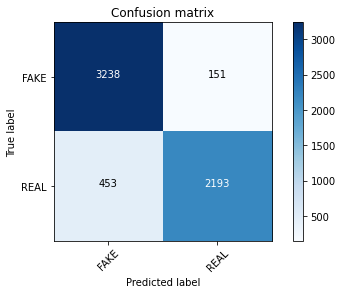

In [19]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

In [21]:
score

0.899917149958575

In [22]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
X_test.shape

(6035, 5000)

In [24]:
pred[6033]

0

In [25]:
messages.text[6033]

'When it comes to predicting how   Donald J. Trump’s administration will affect America’s schools and universities, education experts say they are struggling to read the tea leaves. “The fundamental issue is that nobody really knows what the Trump administration is about” on education, said Frederick M. Hess, a conservative education policy expert. At a panel discussion in Washington last week, he joked that Mr. Trump’s trademark educational achievement thus far, creating the controversial Trump University, placed him in history alongside another president, Thomas Jefferson, the founder of the University of Virginia. “He’s been all over the map on a number of these questions,” Mr. Hess, the director of education policy studies for the American Enterprise Institute, said during a panel discussion on Wednesday at the Shanker Institute, an education nonprofit. Mr. Hess is among education experts and policy makers who, since the election, have been trying to figure out what a Trump adminis

In [26]:
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.951


Confusion matrix, without normalization


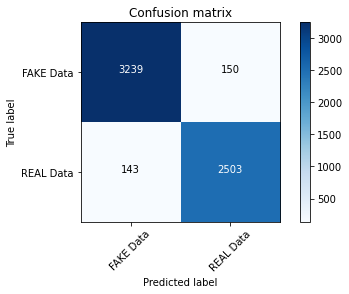

In [27]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])